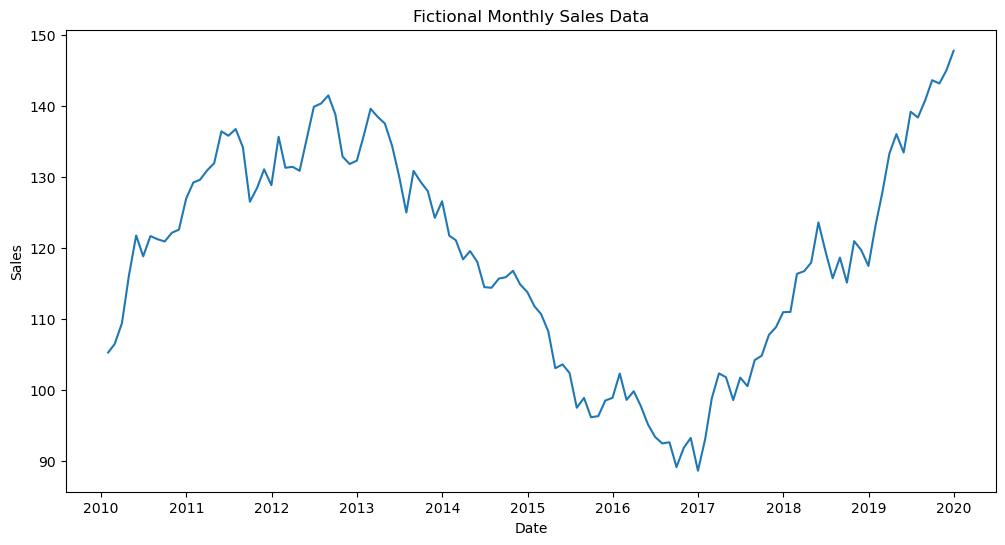

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate fake monthly sales data
np.random.seed(0)
date_range = pd.date_range(start='1/1/2010', end='12/31/2019', freq='M')
sales = 100 + 3 * np.random.randn(len(date_range)).cumsum()

# Create a pandas DataFrame
sales_data = pd.DataFrame({'date': date_range, 'sales': sales})
sales_data = sales_data.set_index('date')

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(sales_data)
plt.title('Fictional Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [11]:
sales_data.head(5)

,sales
date,
2010-01-31,105.292157
2010-02-28,106.492629
2010-03-31,109.428843
2010-04-30,116.151522
2010-05-31,121.754196


ADF Statistic: -0.48400692592357153
p-value: 0.8950998330828952
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}


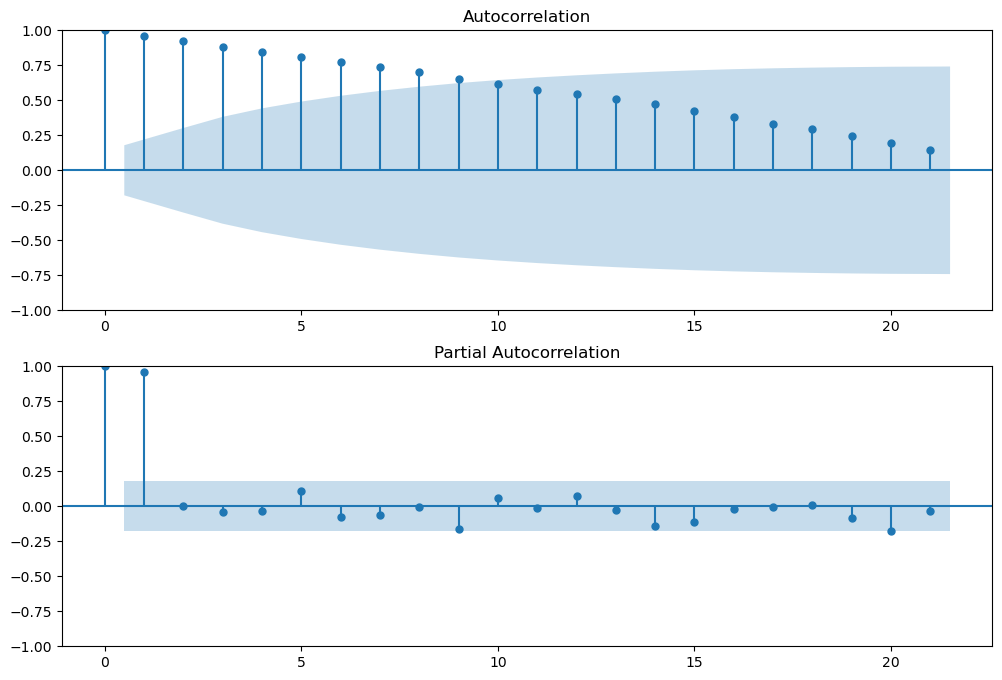

Forecasted Sales for the next 12 months:
2020-01-31    148.826590
2020-02-29    149.874969
2020-03-31    150.886693
2020-04-30    151.863043
2020-05-31    152.805258
2020-06-30    153.714530
2020-07-31    154.592010
2020-08-31    155.438812
2020-09-30    156.256006
2020-10-31    157.044629
2020-11-30    157.805678
2020-12-31    158.540119
Freq: M, Name: predicted_mean, dtype: float64


C:\Users\CPS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\CPS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\CPS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [9]:
# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(sales_data['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Plot ACF and PACF to identify parameters for ARIMA
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(sales_data, ax=ax1)
plot_pacf(sales_data, ax=ax2)
plt.show()

# Fit ARIMA model
model = ARIMA(sales_data, order=(1,1,1))  # Example order - (p, d, q)
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=12)  # Forecasting 12 months into the future

# Print the forecasted sales
print("Forecasted Sales for the next 12 months:")
print(forecast)


In [13]:
adfuller(sales_data['sales'])

(-0.48400692592357153,
 0.8950998330828952,
 0,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 546.5579149632357)

<Axes: >

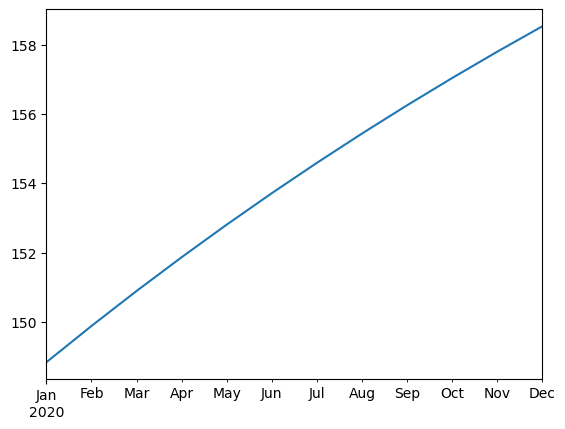

In [15]:
forecast.plot()